## Gradient Discent for both m and b

In [11]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [4]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

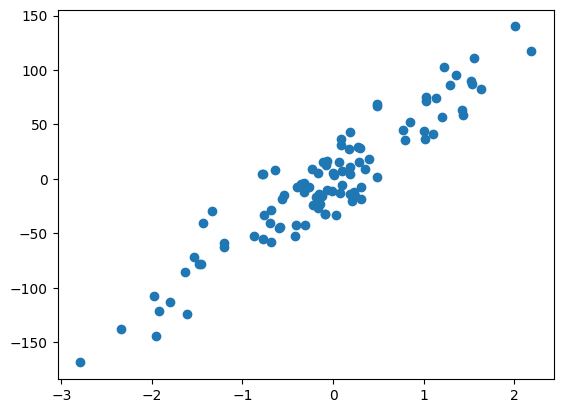

In [5]:
plt.scatter(x,y)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[55.39412613]
1.8974575865951575


In [43]:
# np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8854976048648383

In [44]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
        print(self.m,self.b)

    def predict(self,x):
        return self.m*x + self.b
        

In [45]:
gd = GDRegressor(0.001,50)

In [46]:
gd.fit(x_train,y_train)

55.400824380954546 1.8786226178274226


In [47]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.885576227952155